# EDA on the training data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
training_data = pd.read_csv('./Datasets/training_data_with_aqi.csv')

# Distribution of the target variable

In [4]:
training_data.head(3)

,CityName,CountyName,StateAbbr,TractFIPS,StateDesc,CountyFIPS,ACCESS2_2017,ACCESS2_trend,AQI_2017,AQI_trend,...,MHLTH_trend,OBESITY_2017,OBESITY_trend,PHLTH_2017,PHLTH_trend,STROKE_2017,STROKE_trend,Unemployment_rate_2017,Unemployment_trend,DIABETES_3Y_Change_Percentage
0,Birmingham,Jefferson,AL,1073000100,Alabama,1073,24.4,4.721030,39.0,-2.5,...,10.215054,46.4,-1.902748,20.5,2.500000,5.5,-1.785714,4.4,-22.807018,9.770115
1,Birmingham,Jefferson,AL,1073000300,Alabama,1073,30.4,6.666667,39.0,-2.5,...,15.217391,47.8,0.631579,22.2,7.766990,6.1,3.389831,4.4,-22.807018,10.101010
2,Birmingham,Jefferson,AL,1073000400,Alabama,1073,24.7,3.347280,39.0,-2.5,...,7.428571,45.7,-3.177966,19.4,0.518135,5.6,-1.754386,4.4,-22.807018,2.717391


In [5]:
np.mean(training_data['DIABETES_3Y_Change_Percentage'])

1.3889859594419893

#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(0.5, 1.0, 'Diabetes Prevalence Percentage Changes 2017-2020, by Census Tract')

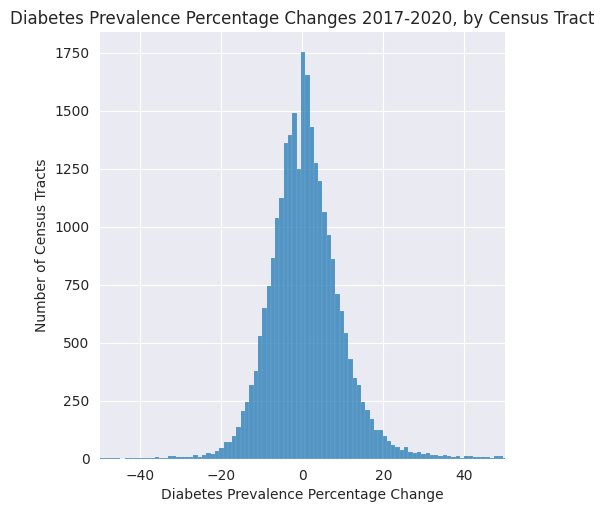

In [6]:
sns.displot(training_data['DIABETES_3Y_Change_Percentage'], bins=500)
# plt.figure(figsize=(15,6))

plt.xlim([-50,50])
plt.xlabel('Diabetes Prevalence Percentage Change')
plt.ylabel('Number of Census Tracts')
plt.title('Diabetes Prevalence Percentage Changes 2017-2020, by Census Tract')

# Check for vottrlsyiond in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

In [12]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS',
    'CountyName'
])

target_features = set([
    'DIABETES_3Y_Change_Percentage'
])

numerical_features = list(set(training_data.columns) - non_numerical_features - target_features)


# Seems like there are a few highly correlated variables

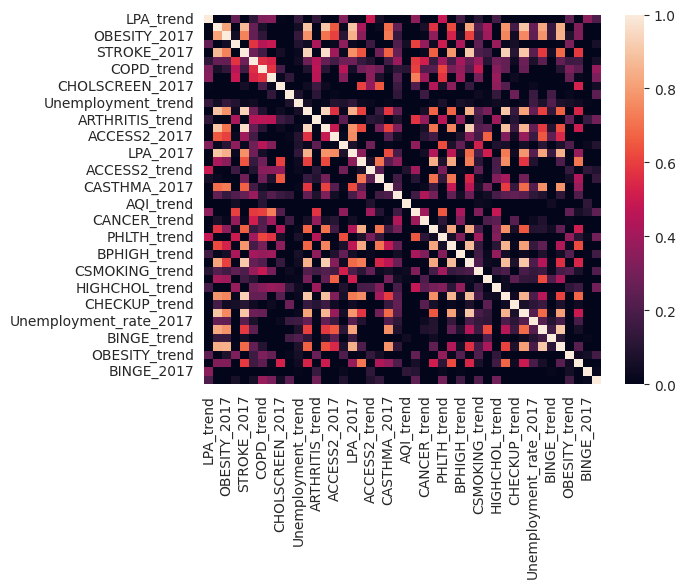

In [13]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

# See which pairings have the highest correlation

## Seems that the cardiovascular features have high correlation, which is to be expected

In [18]:
correlations = corr_map.unstack()

# remove self-correlations (should all be 1 anyways)
correlations = correlations[correlations.index.get_level_values(0) != correlations.index.get_level_values(1)]

# sort by values in descending order, get top 10
top_correlations = correlations.abs().sort_values(ascending=False)[:15]

top_correlations


STROKE_2017    KIDNEY_2017      0.961441
KIDNEY_2017    STROKE_2017      0.961441
               DIABETES_2017    0.944165
DIABETES_2017  KIDNEY_2017      0.944165
STROKE_2017    DIABETES_2017    0.934265
DIABETES_2017  STROKE_2017      0.934265
BPHIGH_2017    STROKE_2017      0.928255
STROKE_2017    BPHIGH_2017      0.928255
KIDNEY_2017    CHD_2017         0.917431
CHD_2017       KIDNEY_2017      0.917431
STROKE_2017    CHD_2017         0.909595
CHD_2017       STROKE_2017      0.909595
CSMOKING_2017  MHLTH_2017       0.902729
MHLTH_2017     CSMOKING_2017    0.902729
STROKE_2017    COPD_2017        0.900991
dtype: float64

# Use PCA to see how much variance can be explained by a few princinpal components

In [23]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [22]:
numerical_feature_df = training_data[numerical_features]

scaler = StandardScaler()
scaler.fit(numerical_feature_df)
training_data_scaled = scaler.transform(numerical_feature_df)

In [26]:
pca_44 = PCA(n_components=44, random_state=2023)
pca_44.fit(training_data_scaled)
X_pca_44 = pca_44.transform(training_data_scaled)

In [27]:
pca_44.explained_variance_ratio_ * 100

array([2.90199222e+01, 1.57703648e+01, 1.08927757e+01, 5.86053769e+00,
       3.69111647e+00, 3.37855213e+00, 2.97126052e+00, 2.83758161e+00,
       2.44966647e+00, 2.23509816e+00, 2.20019165e+00, 1.80505872e+00,
       1.69175119e+00, 1.47864601e+00, 1.38780936e+00, 1.23654785e+00,
       1.15141521e+00, 1.08358954e+00, 9.60140524e-01, 9.26846088e-01,
       7.86770966e-01, 7.82603681e-01, 6.93973217e-01, 6.32915928e-01,
       5.69795710e-01, 5.45750140e-01, 4.98643154e-01, 4.30872974e-01,
       3.70012228e-01, 3.38820699e-01, 2.94512725e-01, 2.41002345e-01,
       1.79120925e-01, 1.68615775e-01, 9.66277718e-02, 7.25873412e-02,
       6.41830804e-02, 4.89430632e-02, 4.67959877e-02, 3.95556468e-02,
       2.23790356e-02, 2.01353298e-02, 1.55385260e-02, 1.09718624e-02])

Text(0.5, 1.0, 'Total variance explained by # principal components')

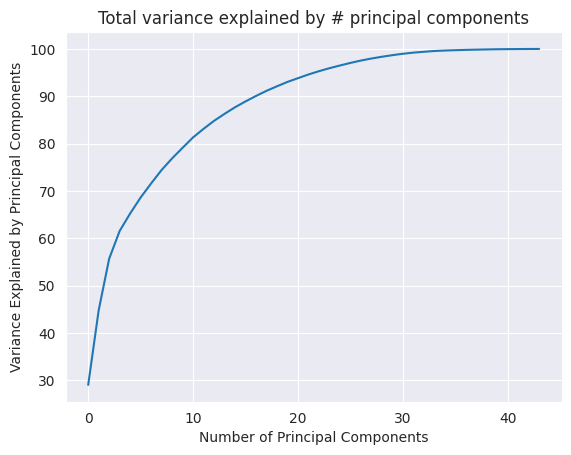

In [31]:
plt.plot(np.cumsum(pca_44.explained_variance_ratio_ * 100))
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained by Principal Components")
plt.title("Total variance explained by # principal components")

# Seems like there is a sharp cutoff after ~25 principal components